In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets, metrics

# Keras
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19, VGG16
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Import Data 

In [0]:
# Meghna's path 
#basepath = '/content/drive/My Drive/University of Chicago/ML Final Project/'

# Li's path
#basepath= '/content/drive/My Drive/ML Final Project/'

# Vamikas path
basepath= '/content/drive/My Drive/ML Final Project/'

# Viviana path
# basepath= '/content/drive/My Drive/ML Final Project/'

In [5]:
# Import data
train = pd.read_csv(basepath + 'fashion-mnist_train.csv')
test = pd.read_csv(basepath + 'fashion-mnist_test.csv')

print(train.shape, test.shape)

(60000, 785) (10000, 785)


In [15]:
# View data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [16]:
# Check class distribution for the labels
train['label'].value_counts(normalize = True)

9    0.1
8    0.1
7    0.1
6    0.1
5    0.1
4    0.1
3    0.1
2    0.1
1    0.1
0    0.1
Name: label, dtype: float64

In [6]:
# Separate X and y variables for Train & Test
X = train.drop('label', axis=1)
y = train.loc[:, 'label']

X_test = test.drop('label', axis=1)
y_test = test.loc[:, 'label']

print('Train Data:', X.shape, y.shape)
print('Test Data:', X_test.shape, y_test.shape)

Train Data: (60000, 784) (60000,)
Test Data: (10000, 784) (10000,)


In [0]:
# Standardize from [0,255] to [0,1]
X /= 255
X_test /= 255

In [0]:
# Add desc to label
label_dict = {0: "T-shirt/top", 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

def true_label(x):
    return label_dict[x]

target_names = list(label_dict.values())

# Visualize Data

## Image Block

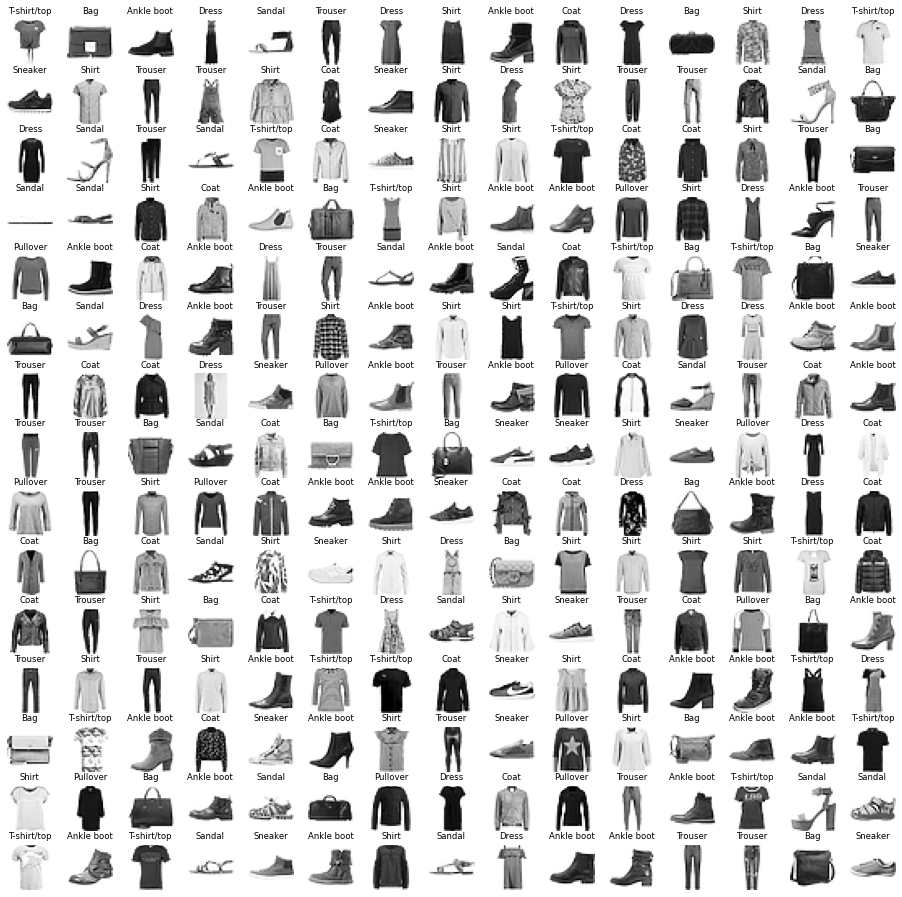

In [20]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    img = X.loc[index].values.reshape(28,28)
    axes[i].imshow(img, cmap = 'Greys')
    axes[i].set_title(true_label(y.loc[index]), fontsize = 8.5, color = 'black')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

## Images per Class

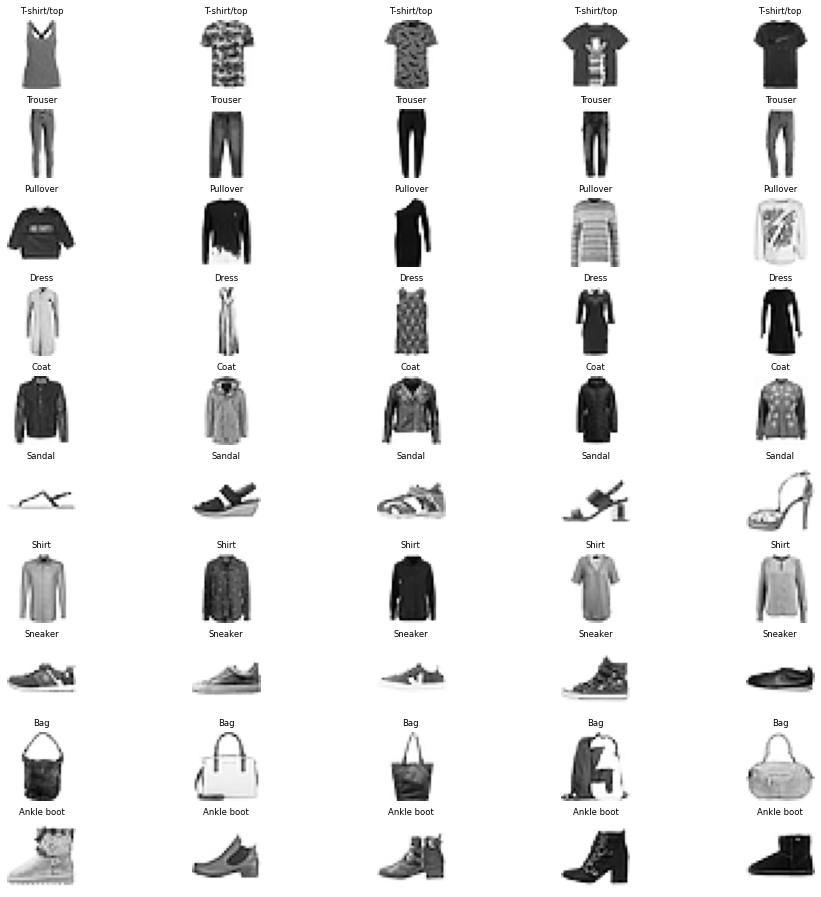

In [21]:
# show 5 examples for a selected class
subset = train.groupby('label').head(5).sort_values('label')
subset_x = subset.drop('label', axis=1)
subset_y = subset.loc[:, 'label']

W_grid = 5
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = i
    # read and display an image with the selected index
    img = subset_x.iloc[index].values.reshape(28,28)
    axes[i].imshow(img, cmap = 'Greys')
    axes[i].set_title(true_label(subset_y.iloc[index]), fontsize = 8.5, color = 'black')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# Dimension Reduction - PCA

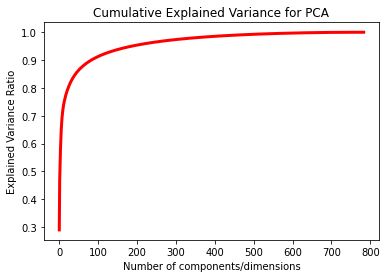

In [22]:
from sklearn.decomposition import PCA

x_train_pca = PCA().fit(X)
ax = plt.plot(np.cumsum(x_train_pca.explained_variance_ratio_), color='red', linewidth=3)
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of components/dimensions')
plt.ylabel('Explained Variance Ratio')
plt.show()

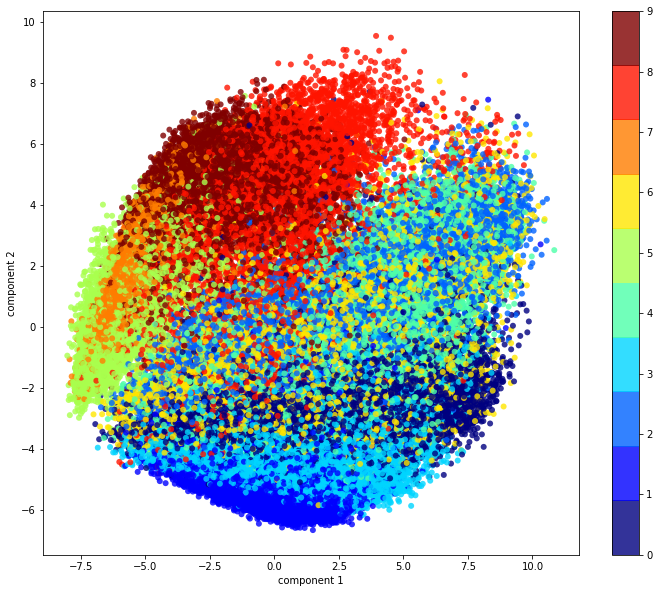

In [23]:
pca = PCA(2)  # project to 2 dimensions
projected = pca.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Cluster Analysis - TSNE

In [24]:
tsne = TSNE(random_state=0, learning_rate=10, n_jobs = -1, verbose=5)
X_2d = tsne.fit_transform(X_train)

NameError: ignored

In [0]:
clothes = y_train.astype('category').cat.codes
clothes_label = clothes.apply(true_label)

plt.figure(figsize=(12, 10))
xs =X_2d[:,0]
ys=X_2d[:,1]
plt.scatter(xs, ys, c=y_train, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

# Cluster Analysis -Umap


In [0]:
# Umap data 
import umap 
data = train.iloc[:, 1:].values.astype(np.float32)
target = train['label'].values
reduce = umap.UMAP(random_state = 223) #just for reproducibility
embedding = reduce.fit_transform(data)

# umap visualization 
df = pd.DataFrame(embedding, columns=('x', 'y'))
df["class"] = target
sns.set_style("whitegrid", {'axes.grid' : False})
#adjusting plot dots with plot_kws
ax = sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=11, plot_kws={"s": 10})
ax.fig.suptitle('Fashion MNIST clustered with UMAP') 

# Train - Validation Split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
print('Train Data:', X_train.shape, y_train.shape)
print('Val Data:', X_val.shape, y_val.shape)
print('Test Data:', X_test.shape, y_test.shape)

Train Data: (48000, 784) (48000,)
Val Data: (12000, 784) (12000,)
Test Data: (10000, 784) (10000,)


# Model 1 - SVM

In [10]:
sv = svm.SVC(C = 5, gamma = 0.001)
sv.fit(X,y)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'SVM (Test): Confusion Matrix')

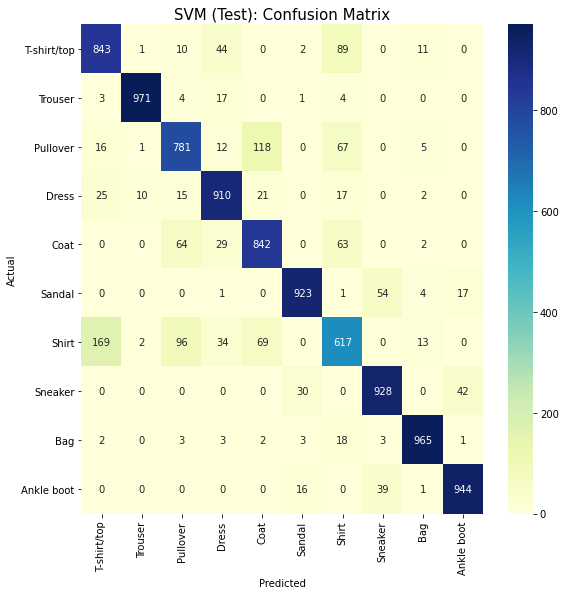

In [11]:
sv_pred = sv.predict(X_test)

# plot confusion matrix
svm_cm = confusion_matrix(y_test, sv_pred)

plt.figure(figsize=(9,9))
sns.heatmap(svm_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('SVM (Test): Confusion Matrix', size = 15)

In [12]:
# classification report - test
cr_svm = classification_report(y_test, sv_pred)
print('SVM (Test) \n', cr_svm)

SVM (Test) 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.80      0.84      0.82      1000
           5       0.95      0.92      0.93      1000
           6       0.70      0.62      0.66      1000
           7       0.91      0.93      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [0]:
# # SMV with kernel trick 
# def fit_predict_score(name,clf):
#     classifier=clf
#     clf.fit(X,y)
#     predicted = clf.predict(X_test)
    
#     plt.figure(figsize=(8, 6))
#     confusion_matrix =  pd.crosstab(index=y_test, columns=predicted.ravel(), 
#                                     rownames=['Expected'], colnames=['Predicted'])
#     sns.heatmap(confusion_matrix, annot=True, fmt='1', xticklabels = target_names, 
#                  yticklabels = target_names, cmap="YlGnBu")
#     accuracy = np.round(metrics.accuracy_score(y_test , predicted),3)
#     plt.title(name + ", Accuracy: " + str(accuracy), fontsize = 15)
#     plt.show()
#     print("Classification report for classifier %s:\n%s\n"
#       % (classifier, metrics.classification_report(y_test, predicted, target_names=target_names)))
    

In [0]:
# fit_predict_score("svm",svm.SVC(C=5., gamma=0.001))

In [0]:
# fit_predict_score("svm",svm.SVC(C=5., gamma=0.001,kernel='poly'))

# Model 2 - XGBoost Classifier

In [0]:
# xbgoost
import xgboost as xgb

D_train = xgb.DMatrix(X, label=y)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.1, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': 10} 

steps = 20

model_xgb = xgb.train(param, D_train, steps)

Text(0.5, 1.0, 'XGB (Test): Confusion Matrix')

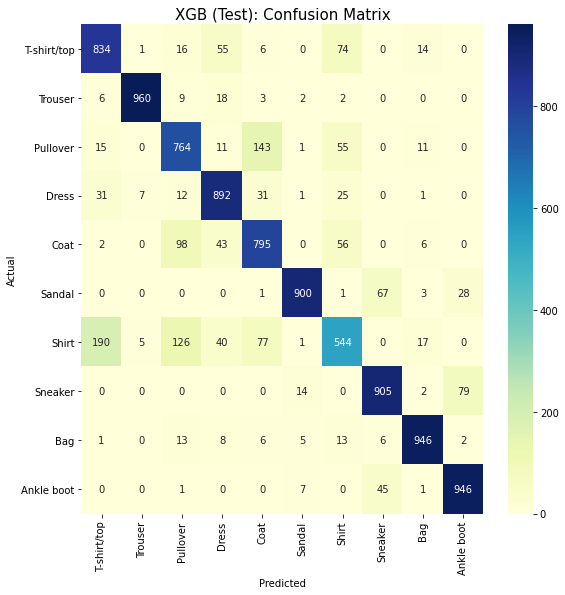

In [14]:
preds_xgb = model_xgb.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds_xgb])

# plot confusion matrix
xgb_cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(9,9))
sns.heatmap(xgb_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('XGB (Test): Confusion Matrix', size = 15)

In [15]:
# classification report - test
cr_xgb = classification_report(y_test, best_preds)
print('XGB (Test) \n', cr_xgb)

XGB (Test) 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.84      0.89      0.86      1000
           4       0.75      0.80      0.77      1000
           5       0.97      0.90      0.93      1000
           6       0.71      0.54      0.61      1000
           7       0.88      0.91      0.89      1000
           8       0.95      0.95      0.95      1000
           9       0.90      0.95      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [0]:
# best_preds = np.asarray([np.argmax(line) for line in preds_xgb])
# best_preds
# confusion_xgb_matrix =  pd.crosstab(index=y_test, columns=best_preds.ravel(), 
#                                     rownames=['Expected'], colnames=['Predicted'])
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_xgb_matrix, annot=True, fmt='1', xticklabels = target_names, 
#                  yticklabels = target_names, cmap="YlGnBu")
# accuracy_xgb = np.round(metrics.accuracy_score(y_test , best_preds),3)
# plt.title("XGB" + ", Accuracy: " + str(accuracy_xgb), fontsize = 15)
# plt.show()
# print("Classification report for classifier %s:"
#  %(metrics.classification_report(y_test, best_preds, target_names = target_names)))

# Model 3 - Gradient Boosting Classifier

In [0]:
gbc = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.3)
gbc.fit(X, y.values.ravel())

In [0]:
from google.colab import files
data_to_load = files.upload()

In [0]:
# pull in yaml model

In [0]:
# test accuracy
gbc_pred = gbc.predict(X_test)
cr_gbc = classification_report(y_test, gbc_pred)
print(cr_gbc)

gbc_acc = accuracy_score(y_test, gbc_pred)
print("Accuracy Score (GBC):", gbc_acc)

In [0]:
# train accuracy
gbc_pred_t = gbc.predict(X_train)
cr_gbc_t = classification_report(y_train, gbc_pred_t)
print(cr_gbc_t)

gbc_acc_t = accuracy_score(y_train, gbc_pred_t)
print("Accuracy Score (GBC - Train):", gbc_acc_t)

# Model 4 - Logistic Regression

In [0]:
# Separate X and y variables for Train & Test
X_lr_train = X
y_lr_train = y

# test variables reminders X_test, y_test

In [17]:
# Create an sklearn.linear_model.LogisticRegression classifier
LR_model = LogisticRegression(multi_class="ovr", penalty='l2',
                         solver="lbfgs", C=10)

# train the classifier using the labels and the feature-scaled pixel values 
LR_model.fit(X_lr_train, y_lr_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# predict dataset pixel_scaled using trained model
y_pred_lr = LR_model.predict(X_test)
y_pred_lr.shape

(10000,)

Text(0.5, 1.0, 'Log Reg (Test): Confusion Matrix')

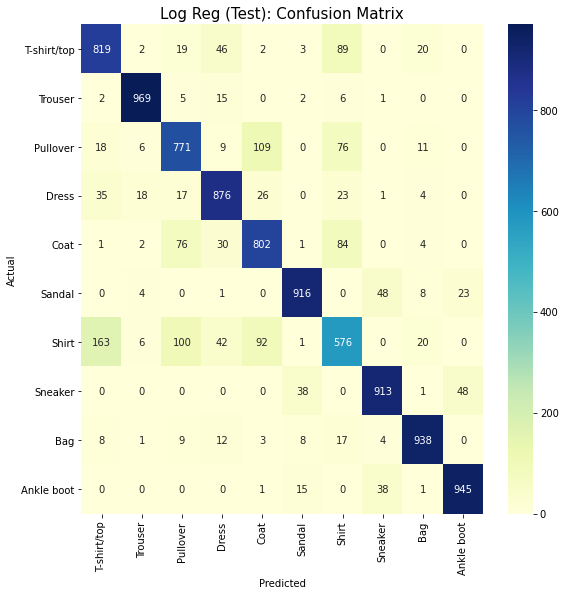

In [55]:
# plot confusion matrix
lr_cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('Log Reg (Test): Confusion Matrix', size = 15)

In [56]:
# classification report - test
cr_lr = classification_report(y_test, y_pred_lr)
print('Log Reg (Test) \n', cr_lr)

Log Reg (Test) 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.77      0.77      1000
           3       0.85      0.88      0.86      1000
           4       0.77      0.80      0.79      1000
           5       0.93      0.92      0.92      1000
           6       0.66      0.58      0.62      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.94      0.93      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



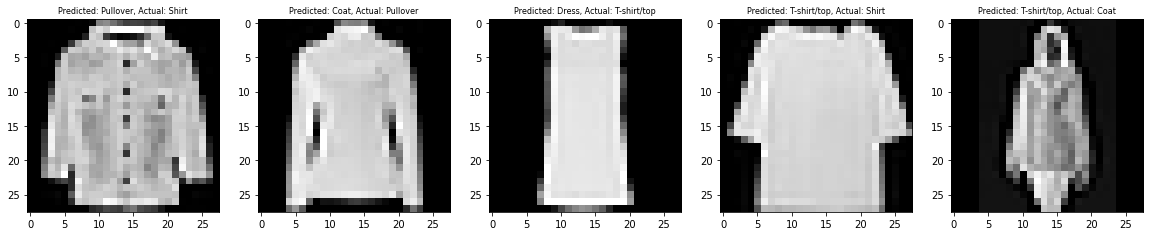

In [57]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred_lr):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[6:11]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test.values[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(label_dict[y_pred_lr[badIndex]], 
                                                 label_dict[y_test[badIndex]]), fontsize = 8)

# Model 5 - Simple NN

In [0]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_val = keras.utils.to_categorical(y_val, 10)

In [23]:
from keras.regularizers import l2
# building a linear stack of layers with the sequential model
model_NN = Sequential()
# hidden layer
model_NN.add(Dense(200, input_shape=(784,), activation='relu'))
model_NN.add(Dense(150, activation='relu',kernel_regularizer=l2(0.01)))
model_NN.add(Dense(110, activation='relu'))
model_NN.add(Dense(50, activation='relu'))
model_NN.add(Dropout(0.2)) # avoid overfitting
model_NN.add(Dense(10, activation='softmax'))

model_NN.summary()
model_NN.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 100 epochs
history_NN=model_NN.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_val, Y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 110)               16610     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 209,820
Trainable params: 209,820
Non-trainable params: 0
________________________________________________

In [64]:
# save models 
model_yaml = model_NN.to_yaml()
with open("/content/drive/My Drive/ML Final Project/model_NN.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    model_NN.save_weights("/content/drive/My Drive/ML Final Project/model_NN.h5")

print("Saved model to disk")

Saved model to disk


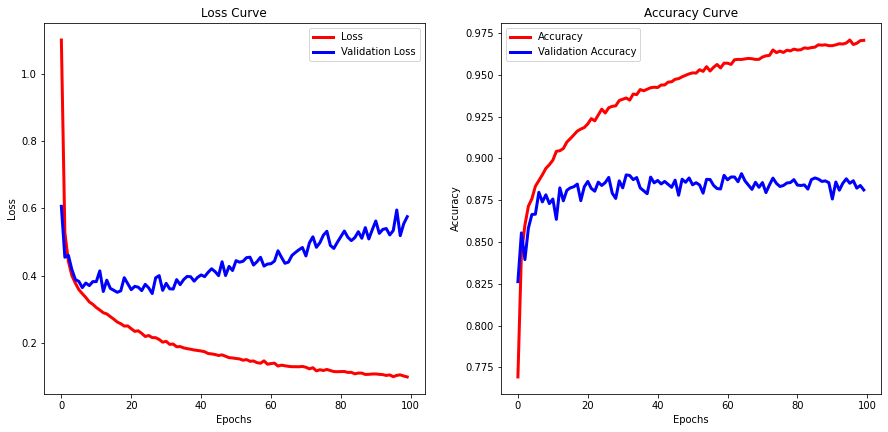

In [25]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history_NN.history['loss'], 'r', linewidth=3.0, label='Loss')
plt.plot(history_NN.history['val_loss'], 'b', linewidth=3.0,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(history_NN.history['accuracy'], 'r', linewidth=3.0, label='Accuracy')
plt.plot(history_NN.history['val_accuracy'], 'b', linewidth=3.0, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

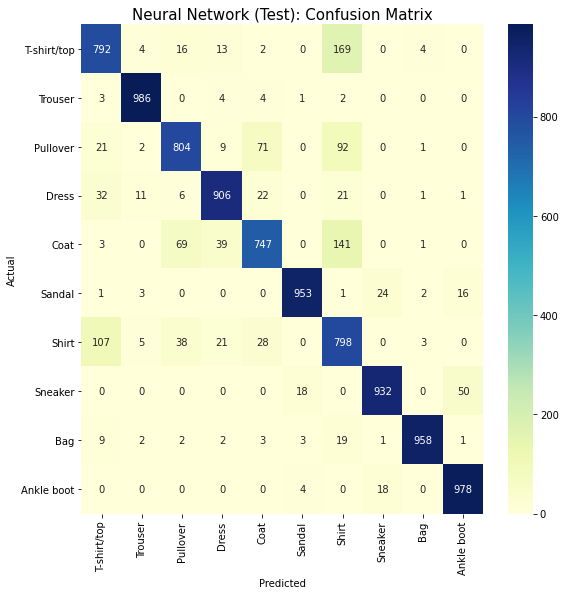

In [26]:
predict_NN_class=model_NN.predict_classes(X_test)

# plot confusion matrix
NN_cm = confusion_matrix(y_test, predict_NN_class)

plt.figure(figsize=(9,9))
sns.heatmap(NN_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('Neural Network (Test): Confusion Matrix', size = 15)
plt.show()

# confusion_matrix_NN =  pd.crosstab(index=y_test, columns=predict_NN_class.ravel(), rownames=['Expected'], colnames=['Predicted'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_NN, annot=True, fmt='1', xticklabels = target_names, 
#                  yticklabels = target_names, cmap="YlGnBu")
# accuracy = np.round(metrics.accuracy_score(y_test , predict_NN_class),3)
# plt.title("Neural Network" + ", Accuracy: " + str(accuracy), fontsize = 15)
# plt.show()
# print(classification_report(y_test, predict_NN_class, target_names = target_names))

In [27]:
# classification report

cr_NN = classification_report(y_test, predict_NN_class)
print('NN (Test) \n', cr_NN)

NN (Test) 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1000
           1       0.97      0.99      0.98      1000
           2       0.86      0.80      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.85      0.75      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.64      0.80      0.71      1000
           7       0.96      0.93      0.94      1000
           8       0.99      0.96      0.97      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Model 6 - NN with 1 CNN Layer

In [0]:
# set image size
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1) 

In [29]:
# reshape images to (28, 28, 1)
X_train_cnn = X_train.values.reshape(X_train.shape[0],*image_shape)
X_val_cnn = X_val.values.reshape(X_val.shape[0],*image_shape)
X_test_cnn = X_test.values.reshape(X_test.shape[0],*image_shape)

print(X_train_cnn.shape, X_val_cnn.shape, X_test_cnn.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


In [30]:
# create CNN model
cnn1_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

cnn1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [0]:
# compile model
cnn1_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# add early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint(basepath + 'cnn1_model.h5', monitor='val_loss', mode='min', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

In [32]:
# fit model
history = cnn1_model.fit(
    X_train_cnn,
    y_train,
    batch_size=4000,
    epochs=100,
    verbose=1,
    validation_data=(X_val_cnn, y_val)
    #callbacks= callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 139us/step - loss: 1.6915 - accuracy: 0.4824 - val_loss: 1.0873 - val_accuracy: 0.6862
Epoch 2/100
48000/48000 [==============================] - 1s 23us/step - loss: 0.8439 - accuracy: 0.7332 - val_loss: 0.6806 - val_accuracy: 0.7607
Epoch 3/100
48000/48000 [==============================] - 1s 23us/step - loss: 0.6271 - accuracy: 0.7774 - val_loss: 0.5833 - val_accuracy: 0.7913
Epoch 4/100
48000/48000 [==============================] - 1s 24us/step - loss: 0.5502 - accuracy: 0.8039 - val_loss: 0.5269 - val_accuracy: 0.8125
Epoch 5/100
48000/48000 [==============================] - 1s 23us/step - loss: 0.5058 - accuracy: 0.8221 - val_loss: 0.4921 - val_accuracy: 0.8253
Epoch 6/100
48000/48000 [==============================] - 1s 23us/step - loss: 0.4760 - accuracy: 0.8325 - val_loss: 0.4685 - val_accuracy: 0.8332
Epoch 7/100
48000/48000 [==============================] - 1s

In [65]:
# save models 
model_yaml = cnn1_model.to_yaml()
with open("/content/drive/My Drive/ML Final Project/cnn1_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    cnn1_model.save_weights("/content/drive/My Drive/ML Final Project/cnn1_model.h5")

print("Saved model to disk")

Saved model to disk


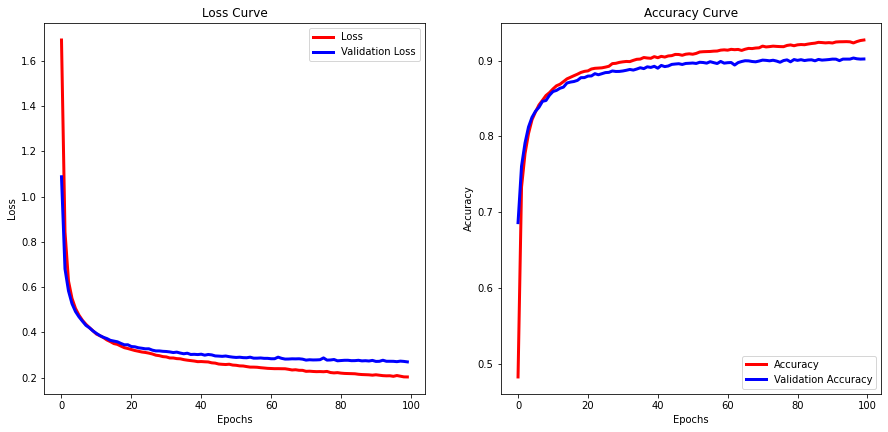

In [34]:
# plot model history
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], 'r', linewidth=3.0, label='Loss')
plt.plot(history.history['val_loss'], 'b', linewidth=3.0,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], 'r', linewidth=3.0, label='Accuracy')
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

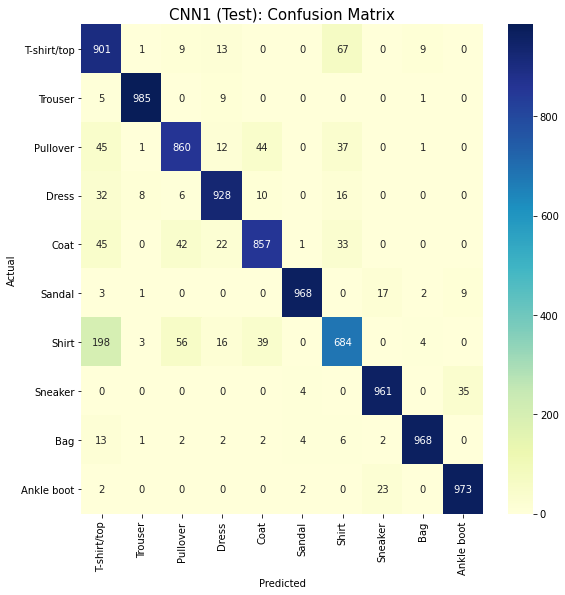

In [35]:
pred_y = cnn1_model.predict(X_test_cnn)
pred_y_cnn = np.argmax(np.round(pred_y),axis=1)

# plot confusion matrix
cnn1_cm = confusion_matrix(y_test, pred_y_cnn)

plt.figure(figsize=(9,9))
sns.heatmap(cnn1_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('CNN1 (Test): Confusion Matrix', size = 15)
plt.show()

# cm =  pd.crosstab(index=y_test, columns=pred_y.ravel(), rownames=['Expected'], colnames=['Predicted'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='1', xticklabels = target_names, 
#                  yticklabels = target_names, cmap="YlGnBu")
# accuracy = np.round(metrics.accuracy_score(y_test , pred_y),3)
# plt.title("Neural Network" + ", Accuracy: " + str(accuracy), fontsize = 15)
# plt.show()
# print(classification_report(y_test, pred_y, target_names = target_names))

In [36]:
# classification report

cr_cnn1 = classification_report(y_test, pred_y_cnn)
print('CNN 1 (Test) \n', cr_cnn1)

CNN 1 (Test) 
               precision    recall  f1-score   support

           0       0.72      0.90      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.88      0.86      0.87      1000
           3       0.93      0.93      0.93      1000
           4       0.90      0.86      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.68      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [0]:
# # visualize for one image
# # Visualize images for each layers in cnn1_model
# from keras.models import Model
# layer_cnn1_outputs = [layer.output for layer in cnn1_model.layers[0:4]]  # this is first 4 layers in cnn1 model
# activation_model_cnn1 = Model(inputs=cnn1_model.input,outputs=layer_cnn1_outputs)

# img = X_train_cnn[1].reshape(1,28,28,1)
# fig = plt.figure(figsize=(5,5))
# plt.imshow(img[0,:,:,0])
# plt.axis('off')

# activations_cnn1 = activation_model_cnn1.predict(img)


# layer_names_cnn1 = []
# for layer in cnn1_model.layers[1:]:
#     layer_names_cnn1.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
# images_per_row = 16
# for layer_name, layer_activation in zip(layer_names_cnn1, activations_cnn1): # Displays the feature maps
#     n_features = layer_activation.shape[-1] # Number of features in the feature map
#     size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
#     n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
#     display_grid = np.zeros((size * n_cols, images_per_row * size))
#     for col in range(n_cols): # Tiles each filter into a big horizontal grid
#         for row in range(images_per_row):
#             channel_image = layer_activation[0,
#                                              :, :,
#                                              col * images_per_row + row]
#             channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
#             channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#             display_grid[col * size : (col + 1) * size, # Displays the grid
#                          row * size : (row + 1) * size] = channel_image
#     scale = 1. / size
#     plt.figure(figsize=(scale * display_grid.shape[1],
#                         scale * display_grid.shape[0]))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


# Model 7 - NN with 2 CNN Layers

In [37]:
import tensorflow
cnn2_model = Sequential()
cnn2_model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28,1)))
cnn2_model.add(BatchNormalization())
cnn2_model.add(Conv2D(32, (2, 2), activation='relu'))
cnn2_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn2_model.add(Dropout(0.25))
cnn2_model.add(Flatten())
cnn2_model.add(Dense(64, activation='relu'))
cnn2_model.add(Dropout(0.25))
cnn2_model.add(Dense(10, activation='softmax'))
cnn2_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn2_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [38]:
history_CNN = cnn2_model.fit(X_train_cnn, Y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_val_cnn, Y_val)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.5226 - accuracy: 0.8151 - val_loss: 1.0433 - val_accuracy: 0.8687
Epoch 2/50
48000/48000 [==============================] - 6s 118us/step - loss: 0.3495 - accuracy: 0.8741 - val_loss: 0.3248 - val_accuracy: 0.8773
Epoch 3/50
48000/48000 [==============================] - 6s 119us/step - loss: 0.3008 - accuracy: 0.8889 - val_loss: 0.2693 - val_accuracy: 0.9013
Epoch 4/50
48000/48000 [==============================] - 6s 118us/step - loss: 0.2712 - accuracy: 0.9000 - val_loss: 0.2561 - val_accuracy: 0.9064
Epoch 5/50
48000/48000 [==============================] - 6s 119us/step - loss: 0.2537 - accuracy: 0.9084 - val_loss: 0.2502 - val_accuracy: 0.9051
Epoch 6/50
48000/48000 [==============================] - 6s 119us/step - loss: 0.2317 - accuracy: 0.9146 - val_loss: 0.2504 - val_accuracy: 0.9087
Epoch 7/50
48000/48000 [==============================] - 6s 1

In [66]:
# save models 
model_yaml = cnn2_model.to_yaml()
with open("/content/drive/My Drive/ML Final Project/cnn2_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    cnn2_model.save_weights("/content/drive/My Drive/ML Final Project/cnn2_model.h5")

print("Saved model to disk")

Saved model to disk


In [0]:
# yaml_file = open('cnn2_model.yaml', 'r')
# loaded_model_yaml = yaml_file.read()
# yaml_file.close()
# cnn2_model_reconstruct = tensorflow.keras.models.model_from_yaml(loaded_model_yaml)
# # load weights into new model
# cnn2_model_reconstruct.load_weights("cnn2_model.h5")
# print("Loaded model from disk")

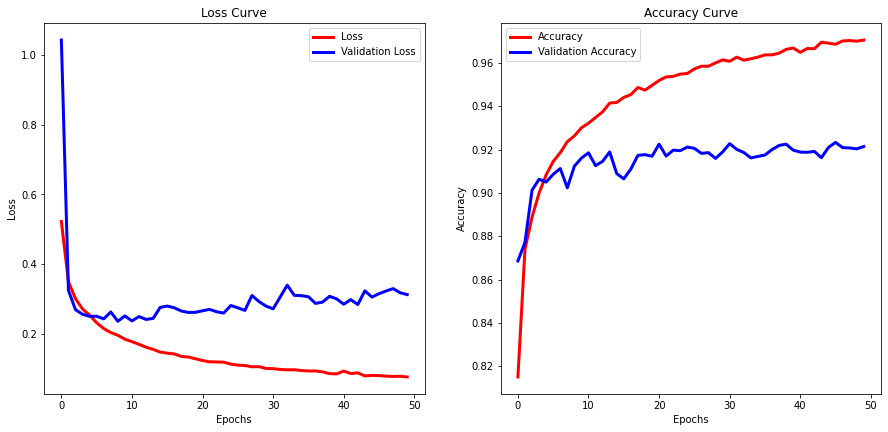

In [40]:
# plot model history
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history_CNN.history['loss'], 'r', linewidth=3.0, label='Loss')
plt.plot(history_CNN.history['val_loss'], 'b', linewidth=3.0,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(history_CNN.history['accuracy'], 'r', linewidth=3.0, label='Accuracy')
plt.plot(history_CNN.history['val_accuracy'], 'b', linewidth=3.0, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [41]:
# evaluate the model
Y_test = keras.utils.to_categorical(y_test, 10)
score_CNN=cnn2_model.evaluate(X_train_cnn, Y_train, verbose=0)
print('Train loss:', score_CNN[0])
print('Train accuracy:', score_CNN[1])
score_CNN_test= cnn2_model.evaluate(X_test_cnn, Y_test, verbose=0)
print('Test loss:', score_CNN_test[0])
print('Test accuracy:', score_CNN_test[1])

Train loss: 0.019695291066843007
Train accuracy: 0.9959166646003723
Test loss: 0.3153052675837651
Test accuracy: 0.9233999848365784


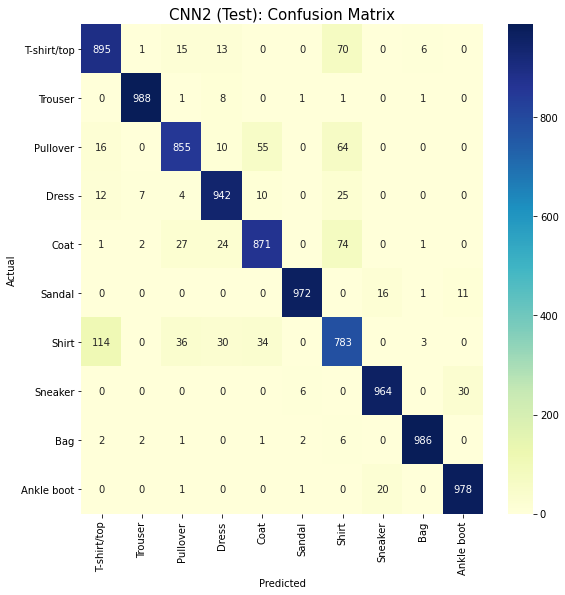

In [42]:
# confusion matrix 
predict_CNN_class=cnn2_model.predict_classes(X_test_cnn)

# plot confusion matrix
cnn2_cm = confusion_matrix(y_test, predict_CNN_class)

plt.figure(figsize=(9,9))
sns.heatmap(cnn2_cm, annot=True, fmt='1', xticklabels = target_names, yticklabels = target_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.title('CNN2 (Test): Confusion Matrix', size = 15)
plt.show()

# confusion_matrix_CNN =  pd.crosstab(index=y_test, columns=predict_CNN_class.ravel(), rownames=['Expected'], colnames=['Predicted'])
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_CNN, annot=True, fmt='1', xticklabels = target_names, 
#                  yticklabels = target_names, cmap="YlGnBu")
# CNN_accuracy = np.round(metrics.accuracy_score(y_test , predict_CNN_class),3)
# plt.title("Convolutional Neural Network" + ", Accuracy: " + str(CNN_accuracy), fontsize = 15)
# plt.show()
# print(classification_report(y_test, predict_CNN_class, target_names = target_names))


In [43]:
# classification report

cr_cnn2 = classification_report(y_test, predict_CNN_class)
print('CNN 2 (Test) \n', cr_cnn2)

CNN 2 (Test) 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.85      0.88      1000
           3       0.92      0.94      0.93      1000
           4       0.90      0.87      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.78      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [0]:
# Visualize images for each layers in cnn2
from keras.models import Model
layer_cvv2_outputs = [layer.output for layer in cnn2_model.layers[0:4]]
activation_model_cnn2 = Model(inputs=cnn2_model.input,outputs=layer_cvv2_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


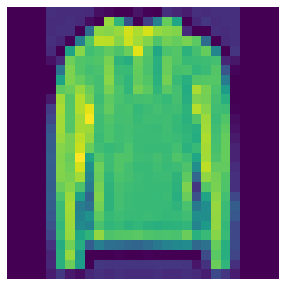

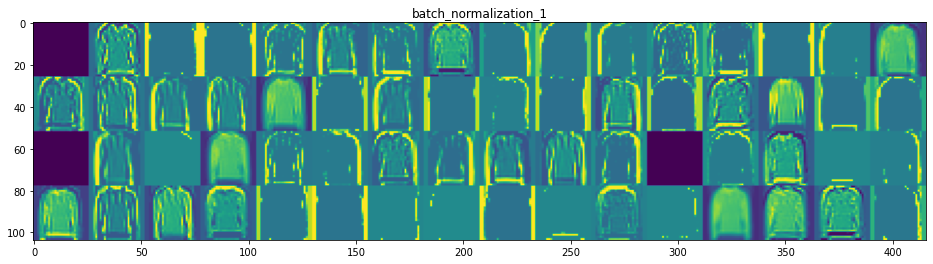

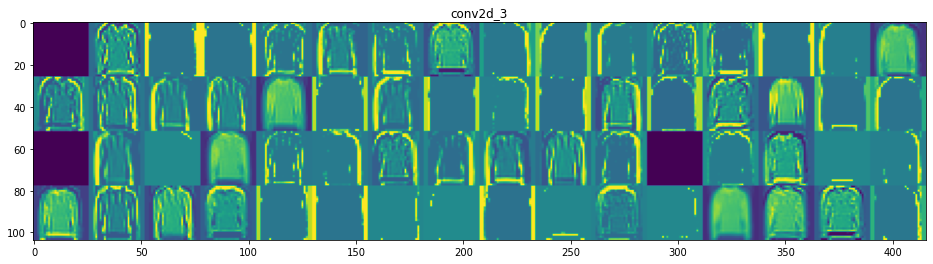

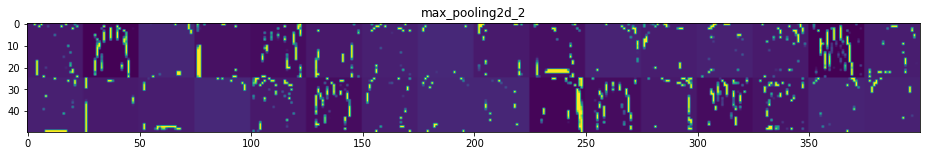

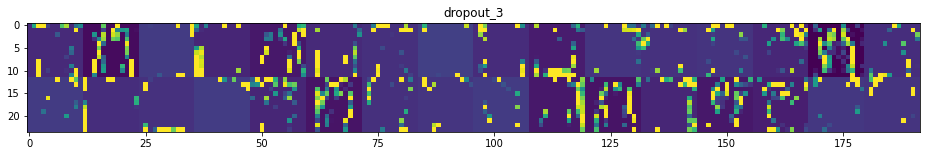

In [46]:
# choose a piciture to visualize 
img = X_train_cnn[1].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0])
plt.axis('off')

activations = activation_model_cnn2.predict(img)


layer_names = []
for layer in cnn2_model.layers[1:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Evaluation

In [58]:
# models predicted values on test 
y_preds = {'SVM':sv_pred, 'XGB':best_preds, 'Logistic_Regression': y_pred_lr, 'Nueral_Network': predict_NN_class, 'CNN_1': pred_y_cnn, 'CNN_2': predict_CNN_class}
models = ['SVM', 'XGB', 'Logistic_Regression', 'Nueral_Network', 'CNN_1', 'CNN_2']
models_precision = []
models_recall = []
models_f1_score = []
models_accuracy = []

# ,

# run through the models classification reports and pull out evaluation metrics 
for model in models:
    clf_report = classification_report(y_test, y_preds[model], output_dict=True)
    models_precision.append(clf_report['macro avg']['precision'])
    models_recall.append(clf_report['macro avg']['recall'])
    models_f1_score.append(clf_report['macro avg']['f1-score'])
    models_accuracy.append(clf_report['accuracy'])
    
# initialise data of lists
models_evaluation = {'model_precision': models_precision,
        'model_recall': models_recall,
        'models_f1_score': models_f1_score,
        'models_accuracy_score': models_accuracy} 

# Creates dataframe for evaluation metrics 
models_eval_metrics = pd.DataFrame(models_evaluation, index = models)
models_eval_metrics

,model_precision,model_recall,models_f1_score,models_accuracy_score
SVM,0.871190,0.8724,0.871287,0.8724
XGB,0.847906,0.8486,0.846678,0.8486
Logistic_Regression,0.850441,0.8525,0.851077,0.8525
Nueral_Network,0.890861,0.8854,0.886725,0.8854
CNN_1,0.911544,0.9085,0.908428,0.9085
CNN_2,0.923935,0.9234,0.923487,0.9234


# Prediction